                                                                                                 Presented By Rajesh Kumar        

## Major Assignment - Machine Learning

<b>Pipelines in Data Science Projects:-</b><br>
Data Analysis<br>
Data Cleaning<br>
Feature Engineering<br>
Feature Selection<br>
Model Selection<br>
Model Deployment

There are two classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch.

    •	Non-Spill: negative case, or majority class.<br>
    •	Oil Spill: positive case, or minority class.

There are a total of 50 Columns in the Dataset , the output column is named as target.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.973404255319149


## OR

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9893617021276596
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       182
           1       1.00      0.67      0.80         6

    accuracy                           0.99       188
   macro avg       0.99      0.83      0.90       188
weighted avg       0.99      0.99      0.99       188



Download the Oil Spill Dataset and perform Data cleaning and Data
Pre-Processing if Necessary

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Perform data cleaning and preprocessing
# Example: Remove missing values
missing_values =  dataset.isnull().sum()
dataset.dropna(inplace=True)

# Example: Perform feature scaling
scaler = StandardScaler()
dataset[['f_1', 'f_2']] = scaler.fit_transform(dataset[['f_1', 'f_2']])

# Save the cleaned and preprocessed dataset
cleaned_filename = 'cleaned_oil_spill_dataset.csv'
dataset.to_csv(cleaned_filename, index=False)

print("Data cleaning and preprocessing completed. Cleaned dataset saved as", cleaned_filename)

Data cleaning and preprocessing completed. Cleaned dataset saved as cleaned_oil_spill_dataset.csv


Use the various methods such as Handling null values, One-Hot
Encoding, Imputation and Scaling of Data Pre-Processing where
necessary.

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('oil_spill.csv')

# Handling null values
# Option 1: Drop rows with missing values
df.dropna(inplace=True)

# Option 2: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different imputation strategies (mean, median, most_frequent, etc.)
imputed_df = imputer.fit_transform(df)

# One-Hot Encoding categorical data
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first column to avoid multicollinearity
encoded_df = pd.DataFrame(encoder.fit_transform(df[['target']]))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['target'], axis=1, inplace=True)

# Scaling of numerical features
scaler = StandardScaler()
scaler_df = scaler.fit_transform(encoded_df)

# Save the preprocessed dataset
preprocessed_filename = 'preprocessed_dataset.csv'
df.to_csv(preprocessed_filename, index=False)

print("Data preprocessing completed. Preprocessed dataset saved as", preprocessed_filename)

Data preprocessing completed. Preprocessed dataset saved as preprocessed_dataset.csv


## OR 

In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Separate the features (X) and target (y)
x = dataset.drop('target', axis=1)
y = dataset['target']

# Define the preprocessing steps for different types of columns
numeric_features = ['f_1', 'f_2']
categorical_features = ['f_1', 'f_2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Apply the preprocessing steps to the columns
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(x)

# Optional: Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed)

# Print the preprocessed data
print(X_preprocessed.head())

                                                   0
0    (0, 0)\t-1.2409224796832914\n  (0, 1)\t1.152...
1    (0, 0)\t-1.2255241355551083\n  (0, 1)\t11.38...
2    (0, 0)\t-1.210125791426925\n  (0, 1)\t-0.112...
3    (0, 0)\t-1.1947274472987417\n  (0, 1)\t0.449...
4    (0, 0)\t-1.1793291031705586\n  (0, 1)\t-0.01...


Derive some insights from the dataset with example.

Number of rows: 937
Number of columns: 50
Summary statistics of numeric columns:
              f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12

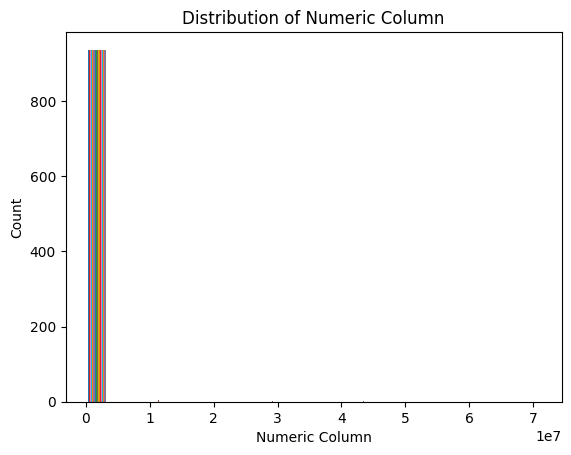

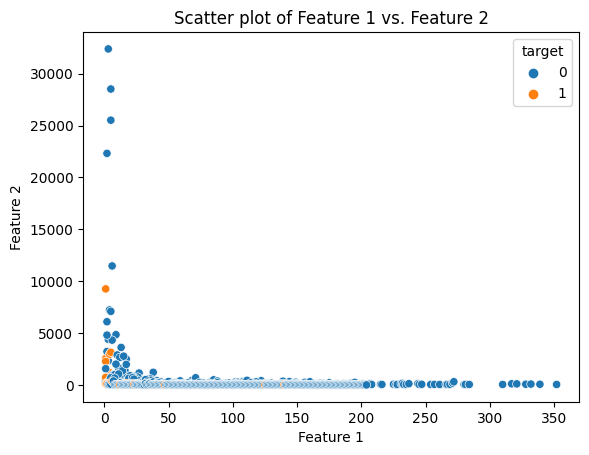

Mean of numeric column by category:
target
0    84.095982
1    26.780488
Name: f_1, dtype: float64
Outliers in f_1
     f_1  f_2      f_3      f_4  f_5     f_6    f_7    f_8     f_9  f_10  ...  \
283  266   51   508.53   162.41   62  127500  37.33   1.21  1770.0  0.03  ...   
284  267   61  1352.54   204.51   24  152500  28.36   7.27  1930.0  0.26  ...   
285  269   64   475.50   266.16   32  160000  38.28   1.23  1940.0  0.03  ...   
286  271  191  1263.12   945.90   57  477500  29.79   7.58  3690.0  0.25  ...   
287  272  315  1248.79   856.47   74  787500  29.14   9.02  5590.0  0.31  ...   
288  280   51  1284.37    13.27   64  127500  29.96   6.34  1890.0  0.21  ...   
289  281   56  1186.32   397.04  118  140000  33.05  10.33  2190.0  0.31  ...   
290  284   55  1002.47  1192.27    8  137500  30.49   7.86  1580.0  0.26  ...   
291  310   55  1208.25  1012.00  167  137500  31.71   6.50  1530.0  0.20  ...   
292  317  117  1269.88   917.89  123  292500  29.16   8.85  2440.0  0.30  .

In [38]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Explore the dataset
# Example 1: Get the dimensions of the dataset (number of rows and columns)
num_rows, num_cols = dataset.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Example 2: Check the summary statistics of numeric columns
numeric_cols = dataset.select_dtypes(include='number').columns
numeric_summary = dataset[numeric_cols].describe()
print("Summary statistics of numeric columns:")
print(numeric_summary)

# Example 3: Calculate the correlation between features and the target variable
correlation = dataset.corr()['target']
print("Correlation with target variable:")
print(correlation)

# Example 4: Count the occurrences of each category in a categorical column
categorical_col = 'target'
category_counts = dataset[categorical_col].value_counts()
print("Category counts:")
print(category_counts)

# Example 5: Visualize the distribution of a numeric column
import matplotlib.pyplot as plt
plt.hist(dataset, bins=20)
plt.xlabel('Numeric Column')
plt.ylabel('Count')
plt.title('Distribution of Numeric Column')
plt.show()

# Example 6: Explore relationships between features using scatter plots or heatmaps
import seaborn as sns
sns.scatterplot(x='f_1', y='f_2', hue='target', data=dataset)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Feature 1 vs. Feature 2')
plt.show()

# Example 7: Grouping and aggregation operations
grouped_data = dataset.groupby('target')['f_1'].mean()
print("Mean of numeric column by category:")
print(grouped_data)

# Example 8: Identify outliers in numeric columns
numeric_cols = dataset.select_dtypes(include='number').columns
for col in numeric_cols:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    print("Outliers in", col)
    print(outliers)

# Note: These are just example insights. You can modify and extend the code based on your specific dataset and analysis goals.

Apply various Machine Learning techniques to predict the output in
target column, make use of Bagging and Ensemble as required and
find the best model by evaluating the model using Model evaluation
techniques.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))

# Train and evaluate a gradient boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

# Apply bagging or ensemble techniques
# Example 1: Bagging with Random Forest Classifier
bagging_classifier = RandomForestClassifier()
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging (Random Forest) Classifier Accuracy:", bagging_accuracy)
print("Bagging (Random Forest) Classifier Report:")
print(classification_report(y_test, bagging_predictions))

# Example 2: Ensemble with Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)])
ensemble_classifier.fit(X_train, y_train)
ensemble_predictions = ensemble_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble (Voting) Classifier Accuracy:", ensemble_accuracy)
print("Ensemble (Voting) Classifier Report:")
print(classification_report(y_test, ensemble_predictions))

# Perform cross-validation for model evaluation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)
cv_scores_gb = cross_val_score(gb_classifier, X, y, cv=5)
cv_scores_bagging = cross_val_score(bagging_classifier, X, y, cv=5)
cv_scores_ensemble = cross_val_score(ensemble_classifier, X, y, cv=5)

print("Cross-validation scores:")
print("Random Forest Classifier:", cv_scores_rf.mean())
print("Gradient Boosting Classifier:", cv_scores_gb.mean())
print("Bagging (Random Forest) Classifier:", cv_scores_bagging.mean())
print("Ensemble (Voting) Classifier:", cv_scores_ensemble.mean())

Random Forest Classifier Accuracy: 0.9840425531914894
Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.50      0.67         6

    accuracy                           0.98       188
   macro avg       0.99      0.75      0.83       188
weighted avg       0.98      0.98      0.98       188

Gradient Boosting Classifier Accuracy: 0.9787234042553191
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.62      0.83      0.71         6

    accuracy                           0.98       188
   macro avg       0.81      0.91      0.85       188
weighted avg       0.98      0.98      0.98       188

Bagging (Random Forest) Classifier Accuracy: 0.973404255319149
Bagging (Random Forest) Classifier Report:
              precision    recall  f1-score   support

   

Save the best model and Load the model

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model
best_model_filename = 'best_model.joblib'
dump(classifier, best_model_filename)
print("Best model saved as", best_model_filename)

# Load the model
loaded_model = load(best_model_filename)

# Make predictions using the loaded model
new_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
loaded_accuracy = accuracy_score(y_test, new_predictions)
print("Accuracy of the loaded model:", loaded_accuracy)

Accuracy: 0.973404255319149
Best model saved as best_model.joblib
Accuracy of the loaded model: 0.973404255319149


Take the original data set and make another dataset by randomly
picking 20 data points from the oil spill dataset and apply the saved
model on the same.

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from joblib import load

# Load the original dataset
original_dataset = pd.read_csv('oil_spill.csv')

# Randomly select 20 data points
new_dataset = original_dataset.sample(n=20, random_state=42)

# Load the saved model
loaded_model = load('best_model.joblib')

# Separate the features (X) and target (y) in the new dataset
X_new = new_dataset.drop('target', axis=1)
y_new = new_dataset['target']

# Apply the saved model on the new dataset
predictions = loaded_model.predict(X_new)

# Display the new dataset with predicted labels
new_dataset_with_predictions = new_dataset.copy()
new_dataset_with_predictions['predicted_target'] = predictions
print(new_dataset_with_predictions)

     f_1  f_2      f_3      f_4  f_5      f_6    f_7    f_8      f_9  f_10  \
321   29  105   881.92  1128.79   83   262500  38.90   8.51   2710.0  0.22   
70    60  111  1153.32  1283.44   41   277500  41.25   5.98   1760.0  0.14   
209   17  867  1059.49   581.31   46  2167500  31.08   8.26  15780.0  0.27   
656    9   85    71.06   469.47  140   688500  70.85  11.28   4626.0  0.16   
685   38   15    32.47   582.13  156   121500  73.27  12.11   1080.0  0.17   
96    86   86   769.73  1761.26   55   215000  37.55   6.27   3090.0  0.17   
468   36  462   904.13  2689.99  129   649687  29.80   8.99   5160.0  0.30   
86    76  128  1378.47   929.73   51   320000  39.80   5.20   3370.0  0.13   
532   38  294    11.49  1559.36   40   413437  38.12  22.22   2893.5  0.58   
327   37   98  1326.06  1109.08   72   245000  41.31   7.53   2880.0  0.18   
528   34  151   465.77  1736.15   73   212343  28.96   8.14   3474.0  0.28   
247  138  144  1341.72    78.22  110   360000  31.12   6.88   46

<b>Oil_Spill_Accuracy :- 98% Using_Over_Sampling. That's a good accuracy. </b>